For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?

$H_0$: Network latency is same before and after switching to ISP\
$H_a$: Network latency has gone up after switching to ISP

- True Positive:
    - low p value
    - reject $H_0$
    - Network latency before the switch 0.5 ms
    - Network latency after the switch 2 ms
 
 
- False Positive:
    - low p value
    - reject $H_0$
    - significantly higher latency time after switch
    - Testing before and after was done with different hardware and different time of day

- True Negative:
    - higher p value
    - accept $H_0$
    - Network latency before the switch 2 ms
    - Network latency after the switch 0.5 ms
     
- False Negative
    - higher p value
    - accept $H_0$
    - network latency has not changed much
    - two tests (before and after) have other variables which affect latency measurement

Is the website redesign any good?

$H_0$: The website redesign does not result in increased customer satisfaction\
$H_a$: The website redesign results in increased customer satisfaction

- True Positive:
    - low p value
    - reject  $H_0$
    - the customer satisfaction rating before website redesign 6/10
    - the customer satisfaction rating after website redsign 9/10

- False Positive: 
    - low p value
    - reject  $H_0$
    - The customer satisfaction rating increased after website redesign
    - The rating questionnaire changed before and after website redesign
    
- False Negative:
    - high p value
    - accept $H_0$
    - survey shows customer satisfaction rating has not changed
    - survey had differenr scales/questions before and after the redesign
- True Negative:
    - higher p value
    - accept $H_0$
    - survey shows customer satisfaction rating has not changed
    - the customer satisfaction rating before website redesign 7.5/10
    - the customer satisfaction rating after website redsign 7/10

Is our television ad driving more sales?

$H_0$: TV ad does not drive more sales\
$H_a$: TV ad does drive more sales

- True Positive:
    - low p value
    - reject  $H_0$
    - average monthly sales before TV ads is 1 million
    - average monthly sales after TV ads is 2.2 million

- False Positive: 
    - low p value
    - reject  $H_0$
    - sales increased after TV ads
    - New products were introduced along with TV ads
    
- False Negative:
    - high p value
    - accept $H_0$
    - sales did not change after TV ads
    - Economy is in recession resulting in lower demand
    
- True Negative:
    - higher p value
    - accept $H_0$
    - sales before TV ads is 1 million
    - sales after TV ads is 0.9 million

# t-test exercise


Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [71]:

from math import sqrt

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy import stats
from pydataset import data

$H_0$: average time to sell homes for its two offices is same\
$H_a$ average time to sell homes for its two offices is different

In [67]:
alpha = 0.05

xbar1 = 90
xbar2 = 100

n1 = 40
n2 = 50

s1 = 15
s2 = 20

degf = (n1 + n2) - 2 # n - number of categories

s_p = sqrt(
    ((n1 - 1) * s1**2 + (n2 - 1) * s2**2)
    /
    (n1 + n2 - 2)
)

t = (xbar1 - xbar2) / (s_p * sqrt(1 / n1 + 1 / n2))


print(f't = {t:.3}')

t = -2.63


In [68]:
p = stats.t(degf).cdf(t) * 2
print(f'p = {p:.3}')

p = 0.0102


Since p value is less than 0.05, we reject the null hypothesis meaning there is difference in average time to sell for two offices

# Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?

In [46]:
mpg = data('mpg')


In [47]:
mpg['average_mpg'] = mpg[['cty', 'hwy']].mean(axis= 1)
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


$H_0$: Cars from both model years have same mpg\
$H_a$: Cars from both model years have different mpg

In [73]:
fe_2008 = mpg[mpg.year == 2008].average_mpg
fe_1999 = mpg[mpg.year == 1999].average_mpg

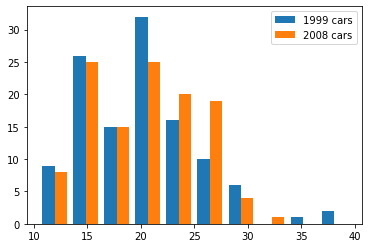

In [75]:
plt.hist([fe_1999, fe_2008], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

In [54]:
t_stat, p = stats.ttest_ind(fe_1999, fe_2008)

print(f't = {t_stat:.3}')
print(f'p = {p:.3}')

t = 0.22
p = 0.826


Since p value is >0.05, we fail to reject the null hypothesis meaning their fuel economy is no different

# Are compact cars more fuel-efficient than the average car? 

$H_0$: compact cars have same fuel efficiency as a average car\
$H_a$: compact cars are more fuel efficient than average car

In [50]:
mpg = mpg.rename(columns ={'class' : 'type'})

In [51]:
x = mpg[mpg.type == 'compact'].average_mpg
mu = mpg.average_mpg.mean()
t_stat, p = stats.ttest_1samp(x, mu)

print(f't = {t_stat:.3}')
print(f'p = {p:.3}')

t = 7.9
p = 4.2e-10


Since p value is <0.05, we reject the null hypothesis meaning their fuel economy is not same

# Do manual cars get better gas mileage than automatic cars?

$H_0$: manual car get same mileage as automatic cars

In [52]:
fe_auto = mpg[mpg.trans.str.contains('auto')].average_mpg
fe_manual = mpg[mpg.trans.str.contains('manual')].average_mpg

In [53]:
t_stat, p = stats.ttest_ind(fe_auto, fe_manual)

print(f't = {t_stat:.3}')
print(f'p = {p:.3}')

t = -4.59
p = 7.15e-06


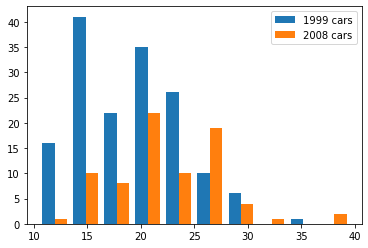

In [76]:
plt.hist([fe_auto, fe_manual], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

Since p value is <0.05, we reject the null hypothesis meaning  fuel economy for manual is better than automatic cars 

In [3]:
df = pd.read_csv('exam_scores.csv')
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


Compare exam scores for folks with high coffee consumption vs low coffee consumption

$H_0$ = Exam scores are same for high and low coffee drinkers.\
$H_0$ = Exam scores are different for high and low cofee drinkers

In [18]:
df['group'] = pd.cut(x=df.coffee_consumed, bins=[0,5,10], labels = ['low', 'high'], include_lowest = True)

In [41]:
df

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept,group
0,100.591011,9.126291,flashcards,left,0,11,low
1,95.637086,9.677438,flashcards,left,1,10,low
2,53.200296,4.550207,NaN,right,5,6,low
3,63.934268,6.487848,flashcards,right,4,7,low
4,51.186370,6.720959,flashcards,right,5,6,low


In [35]:
high_c_score = df[df.group == 'high'].exam_score

In [36]:
low_c_score = df[df.group == 'low'].exam_score

In [55]:
t_stat, p = stats.ttest_ind(low_c_score, high_c_score)
print(f't = {t_stat:.3}')
print(f'p = {p:.3}')

t = 9.06
p = 4.86e-11


Since p-value is < 0.05, the null hypothesis is rejected meaning there is statistically significant different in scores of high vs low coffee drinkers